# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

from scipy.stats import norm
from scipy import stats

In [2]:
medical.shape, medical.isna().sum()

((1338, 8),
 age               0
 sex               0
 bmi               0
 children          0
 smoker            0
 region            0
 charges           0
 insuranceclaim    0
 dtype: int64)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__right skewed data 
 Comment on the analysis of this histogram:
 The distribution is not normal, as we see the data plot very high on left and low on right

(0.0, 66902.85571550002)

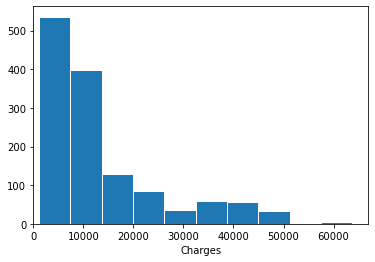

In [4]:
plt.hist(medical['charges'], edgecolor = 'white', bins=10)
plt.xlabel('Charges')
plt.xlim(left = 0)

In [5]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [7]:
mean = np.mean(medical['charges'])
print(mean)

13270.422265141257


In [8]:
std_dev = np.std(medical['charges'])
print(std_dev)

12105.484975561612


In [9]:
# I also compute the median to see how it is different from the mean
median = np.median(medical['charges'])
print(median)

9382.033


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ You want to do a one sided test on the lower side since they are worried the  charge has fallen below a certain number. 
However it looks like Scipy only provides for a two-tailed test.
So we need to run a two-tailed test and divide the p by 2 to arrive at a one-tailed test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

One sided

In [10]:
from scipy.stats import norm

n = len(medical['charges'])
lower = mean + norm.ppf(0.05)*std_dev/np.sqrt(n)
print(lower)

12726.068297006042


This indicates with a 95% confidence interval that the mean is above 12726.07

__A:__ 95% interval is above 12000

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Our assumption about variances is that the two groups have the same variance.

Null Hypothesis $H_0$: there is NO difference in the amount charged between two groups (people with insurance and people without insurance <br> Alternative Hypothesis    $H_\alpha$: there IS a difference in the amount charged between the two groups

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

 Comment: We are getting the same numerical values by both the approaches

### Manual approach

In [11]:
# First define what it means to be insured or uninsured. Insuranceclaim: yes=1, no=0.
insured = medical.charges[medical.insuranceclaim == 1]  
uninsured = medical.charges[medical.insuranceclaim == 0]

In [12]:
# Next find the mean and standard deviation for insured
mean_insured = np.mean(insured)
print(mean_insured)
std_dev_insured = np.std(insured)
print(std_dev_insured)

16423.928276537677
14036.956250260417


In [13]:
# Next find the mean and standard deviation for  uninsured
mean_uninsured = np.mean(uninsured)
print(mean_uninsured)
std_dev_uninsured = np.std(uninsured)
print(std_dev_uninsured)

8821.421892306305
6440.699841605235


In [14]:
# Then calc the stats manually - ugh
n1 = len(insured)
n2 = len(uninsured)
s1 = np.std(insured)
s2 = np.std(uninsured)
mean1 = mean_insured
mean2 = mean_uninsured

sp = np.sqrt( ((n1-1)*(s1)**2 + (n2-1)*(s2)**2)/ (n1+n2-2) )
t = (mean2 - mean1)/(sp * np.sqrt(1/n1 + 1/n2)) 
print(t, norm.pdf(t))

-11.901306943555388 6.981270779090164e-32


In [15]:
from scipy import stats
# Now do the same using scipy stats built in methods
t, p_val = stats.ttest_ind(uninsured, insured, equal_var = True)
print(t, p_val)
# That was a lot easier now we see the benefit of using scipy stats!

-11.893299030876712 4.461230231620717e-31


__A:__ Comment: We are getting the same numerical values by both the approaches

######## The doc for scipy stats for the function to tell it not to assume equal variances:
import scipy.stats.ttest_ind_from_stats
######## See the doc at https://scipy.github.io/devdocs/generated/scipy.stats.ttest_ind_from_stats.html
######### This is Welch's t-test, which does not assume equal population variance.

######## The pseudo code for that test looks like this:

t, p_val = ttest_ind_from_stats(mean1=0.2, std1=np.sqrt(0.16), nobs1=150,
                     mean2=0.225, std2=np.sqrt(0.17437), nobs2=200)
print(t, p_val)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__To perform a z test from a sample in scipy stats use statsmodels.stats.weightstats.ztest

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test

In [3]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 7A91-3158

 Directory of C:\Users\SaiRam\Documents\myfolders\SPRINGBOARD\Chapter 11\11.1\Frequentist Case Study

2021-04-25  12:25 AM    <DIR>          .
2021-04-25  12:25 AM    <DIR>          ..
2021-03-25  11:08 AM             6,148 .DS_Store
2021-03-25  01:07 PM    <DIR>          .ipynb_checkpoints
2021-03-25  11:08 AM             8,196 DS_Store
2021-04-07  06:05 AM            92,724 Frequentist Inference Case Study - Part A (3).ipynb
2021-04-25  12:25 AM            32,199 Frequentist Inference Case Study - Part B (2).ipynb
2021-03-25  11:08 AM            40,665 insurance2.csv
               5 File(s)        179,932 bytes
               3 Dir(s)  441,843,171,328 bytes free
